 # 4.2 Classification
 
 There are two types of supervised learning. (1) Regression and (2) Classification.
 
 Classification is used to predict the label, or category, of an observation. There are several types of classification algorithms, and they can be categorized based on various criteria. Here are the types of classification in supervised learning that we will discuss in this section.
 
 *  **Binary Classification**: In binary classification, the algorithm assigns each data point to one of two possible classes or categories. For example, classifying emails as spam or not spam, or determining whether a patient has a disease or not.


 *  **Multiclass Classification** Multi-class classification involves categorizing data points into more than two distinct classes. For example, classifying images of animals into categories like "cat," "dog," "horse," and "bird."



# Naive Bayes algorithm

A Naive Bayes model is commonly used for testing NLP classification problems because of it uses probability. It attempts to answer the question if given a particular piece of data, how likely is a particular outcome?

 Naive bayes has been used for text classification problems since the 1960s. It is not always the best tool for the job, but it is a simple and effective one.
 
We import the naive bayes model class, `multinomial naive bayes`, which works well with `count vectorizers` as it expects integer inputs.

We test accuracy using `accuracy_score` from the metrics module and passing the predicted and test labels.

To further evaluate our model, we can also check the `confusion matrix` which shows correct and incorrect labels.


# Text data

`fake_or_real_news.csv` : 29.2MB.

In [1]:
import pandas as pd

news_df = pd.read_csv("datasets/fake_or_real_news.csv", index_col = "Unnamed: 0")

In [2]:
print(news_df.shape)
print(news_df.columns)
print(news_df.value_counts("label"))

(6335, 3)
Index(['title', 'text', 'label'], dtype='object')
label
REAL    3171
FAKE    3164
dtype: int64


In [3]:
df2 = pd.DataFrame({"Title": news_df["title"], 
                    "Label":news_df["label"],
                    "Length":[len(item) for item in news_df["text"]]}).sort_values(by="Length",ascending=False)

print(df2.head())

                                                  Title Label  Length
7910  Re: Why Are So Many People Choosing To Leave T...  FAKE  115372
5765  Re: It Is Now Mathematically Impossible To Pay...  FAKE   99355
5604  Benny Morris’s Untenable Denial of the Ethnic ...  FAKE   92561
9618   President Putin Asks US To Stop Provoking Russia  FAKE   68208
8441  Re: America Has Become A Lawless Nation – Hill...  FAKE   56795


In [4]:
X = news_df.text
y = news_df.label
print(X.shape)
print(y.shape)

(6335,)
(6335,)


In [5]:
# CountVectorizer for text classification
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

# Create training and test sets
text_train, text_test, label_train, label_test = train_test_split(news_df.text, 
                                                    news_df.label, 
                                                    test_size = 0.2, 
                                                    random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                   ngram_range=(2, 2), 
                                   max_features=1000, 
                                   token_pattern=r'\b[^\d\W][^\d\W]+\b')

# Transform the training data using only the 'text' column values: count_train 
X_train = count_vectorizer.fit_transform(text_train.values)

# Transform the test data using only the 'text' column values: count_test 
X_test = count_vectorizer.transform(text_test.values)

In [6]:
X_train

<5068x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 86963 stored elements in Compressed Sparse Row format>

In [7]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['abc news', 'access pipeline', 'according new', 'according report', 'administration officials', 'affordable care', 'african american', 'african americans', 'aide huma', 'air force']


In [11]:
y_train = label_train
y_test = label_test
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)


### Using naive bayes classification model

In [12]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Testing accuracy
y_pred_test = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
nb_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
nb_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['FAKE','REAL'])

print(nb_score_test, "\n")
print(nb_conf_matrix,"\n")


0.8547750591949487 

[[522  91]
 [ 93 561]] 



In [17]:
import numpy as np

print(np.sum(np.diag(nb_conf_matrix))/np.sum(nb_conf_matrix))

0.8547750591949487


### Cross validation for Naive Bayes

In [18]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold


# Create a K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate a Multinomial Naive Bayes classifier: nb_cv_classifier
nb_cv_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_cv_classifier.fit(X_train, y_train)


MultinomialNB()

In [19]:
# Testing accuracy
count_test_preds = cross_val_predict(nb_cv_classifier, X_test, y_test, cv=kf)

# Calculate the accuracy score: cv_test_scores
cv_test_scores = cross_val_score(nb_cv_classifier, X_test, y_test, cv=kf)

# Calculate the confusion matrix: 
nb_cv_confmat_test = metrics.confusion_matrix(y_test, count_test_preds, labels = ['FAKE','REAL'])


print("accuracy score = ", metrics.accuracy_score(y_test, count_test_preds))
print("mean of test scores = ", np.mean(cv_test_scores),"\n")
print("Confusion matrix: \n", nb_cv_confmat_test)

accuracy score =  0.7940015785319653
mean of test scores =  0.7940151255796583 

Confusion matrix: 
 [[451 162]
 [ 99 555]]


### Using SVC

In [20]:
from sklearn import svm

svc_classifier = svm.SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svc_classifier.fit(X_train, y_train)

# Testing accuracy
y_pred_test = svc_classifier.predict(X_test)

# Calculate the accuracy score: score
svc_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
svc_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['FAKE','REAL'])

print(svc_score_test, "\n")
print(svc_conf_matrix,"\n")


0.8689818468823993 

[[563  50]
 [116 538]] 



### Using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logres_classifier = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', C=1)

logres_classifier.fit(X_train, y_train)

y_pred_test = logres_classifier.predict(X_test)

# Calculate the accuracy score: score
logres_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
logres_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['FAKE','REAL'])

print(logres_score_test, "\n")
print(logres_conf_matrix,"\n")

0.8729281767955801 

[[566  47]
 [114 540]] 



In scikit-learn, the LogisticRegression class supports both `L1` (Lasso) and `L2` (Ridge) regularization penalties. The penalty parameter is used to specify the type of regularization penalty you want to apply.

L2 regularization adds a penalty term to the logistic regression cost function that encourages the model to have small weights for all features. This helps prevent overfitting by controlling the complexity of the model. The strength of the L2 regularization can be controlled using the C parameter, where smaller values of C correspond to stronger regularization.

# Using random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_classifier.fit(X_train, y_train)

y_pred_test = rf_classifier.predict(X_test)

# Calculate the accuracy score: score
rf_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
rf_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['FAKE','REAL'])

print(rf_score_test, "\n")
print(rf_conf_matrix,"\n")


0.8737174427782163 

[[538  75]
 [ 85 569]] 



### Multiclass Classification

In [32]:
import pandas as pd
tweets = pd.read_csv("datasets/tweets.csv", usecols = ["airline_sentiment", "text"])
print(tweets.shape)

(14640, 2)


In [33]:
print(tweets.head(3))

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...


In [35]:
tweets.value_counts("airline_sentiment")

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64

In [36]:
# CountVectorizer for text classification
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

# Create training and test sets
text_train, text_test, label_train, label_test = train_test_split(tweets.text, 
                                                    tweets.airline_sentiment, 
                                                    test_size = 0.2, 
                                                    random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                   ngram_range=(2, 2), 
                                   max_features=1000, 
                                   token_pattern=r'\b[^\d\W][^\d\W]+\b')

# Transform the training data using only the 'text' column values: count_train 
X_train = count_vectorizer.fit_transform(text_train.values)

# Transform the test data using only the 'text' column values: count_test 
X_test = count_vectorizer.transform(text_test.values)

In [39]:
y_train = label_train
y_test = label_test
print(X_train.shape)
(print(y_train.shape))



(11712, 1000)
(11712,)


# Using naive bayes

In [40]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [77]:
# Testing accuracy
y_pred_test = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
nb_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
nb_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['negative','neutral', 'positive'])



In [78]:
print(nb_score_test, "\n")
nb_conf_matrix

0.6796448087431693 



array([[1700,   59,   60],
       [ 491,  109,   28],
       [ 270,   30,  181]])

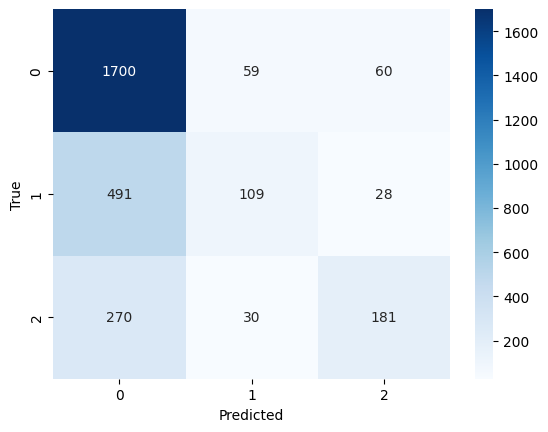

In [79]:
import  seaborn as sns
import matplotlib.pyplot as plt

# Display confusion matrix
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [80]:
from sklearn.metrics import precision_score

# Compute precision for all classes with 'weighted' averaging
weighted_precision = precision_score(y_test, y_pred_test, average='weighted')

print("Weighted Precision:", weighted_precision)

Weighted Precision: 0.6577478657774266


In [81]:
# Calculate precision for each class
precision_per_class = precision_score(y_test, y_pred_test, labels= ["negative", "neutral", "positive"], average=None)
print("Precision for negative class:", precision_per_class[0])
print("Precision for neutral class:", precision_per_class[1])
print("Precision for positive class:", precision_per_class[2])

Precision for negative class: 0.6907761072734661
Precision for neutral class: 0.5505050505050505
Precision for positive class: 0.6728624535315985


### Using Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logres_classifier = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', C=1)

logres_classifier.fit(X_train, y_train)

y_pred_test = logres_classifier.predict(X_test)

# Calculate the accuracy score: score
logres_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Testing accuracy
y_pred_test = logres_classifier.predict(X_test)

# Calculate the accuracy score: score
logres_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
logres_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['negative','neutral', 'positive'])

print(logres_score_test, "\n")
logres_conf_matrix

0.6796448087431693 



array([[1718,   56,   45],
       [ 502,   98,   28],
       [ 280,   27,  174]])

### Using Support Vector Classifier

In [84]:
from sklearn import svm

svc_classifier = svm.SVC(kernel='linear', C=1)

# Fit the classifier to the training data
svc_classifier.fit(X_train, y_train)

# Testing accuracy
y_pred_test = svc_classifier.predict(X_test)

# Calculate the accuracy score: score
svc_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
svc_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['negative','neutral', 'positive'])

print(svc_score_test, "\n")
print(svc_conf_matrix,"\n")

0.6775956284153005 

[[1719   42   58]
 [ 516   86   26]
 [ 280   22  179]] 



In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_classifier.fit(X_train, y_train)

y_pred_test = rf_classifier.predict(X_test)

# Calculate the accuracy score: score
rf_score_test = metrics.accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix: cm
rf_conf_matrix = metrics.confusion_matrix(y_test, y_pred_test, labels = ['negative','neutral', 'positive'])

print(rf_score_test, "\n")
print(rf_conf_matrix,"\n")


0.6635928961748634 

[[1645  100   74]
 [ 479  115   34]
 [ 260   38  183]] 



# Visualizing the classication models with cross validation

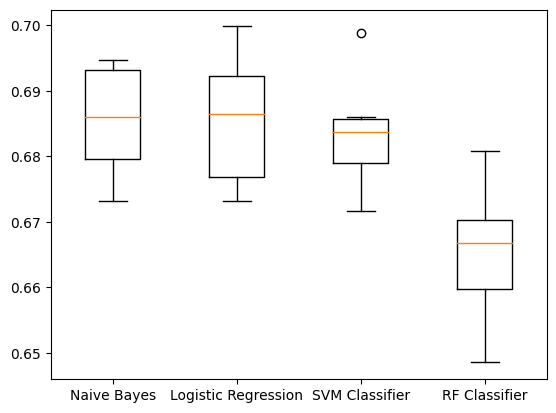

In [98]:
models = {"Naive Bayes": MultinomialNB(), 
          "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', C=1),
         "SVM Classifier": svm.SVC(kernel='linear', C=1),
          "RF Classifier": RandomForestClassifier(n_estimators=100, random_state=42)  
         }
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()